In [7]:
import subprocess
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Make sure we can open the file
try:
    root = subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True).strip()
    os.chdir(root)
except Exception:
    while not (Path.cwd() / "results").exists() and Path.cwd() != Path.home():
        os.chdir("..")

print("Working directory:", Path.cwd())

Working directory: /Users/ecasto/cs230-project


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

models = {
    "LogReg": {
        "probs": np.load("results/lr_probs.npy"),
        "y": np.load("results/lr_y_test.npy")
    },
    "RandomForest": {
        "probs": np.load("results/rf_probs.npy"),
        "y": np.load("results/rf_y_test.npy")
    },
    "MLP_with_score": {
        "probs": np.load("results/mlp_with_score_probs.npy"),
        "y": np.load("results/mlp_with_score_y_test.npy")
    },
    "MLP_no_score": {
        "probs": np.load("results/mlp_no_score_probs.npy"),
        "y": np.load("results/mlp_no_score_y_test.npy")
    },
    # Optional:
    "MLP_bow_counties": {
        "probs": np.load("results/mlp_bow_probs.npy"),
        "y": np.load("results/mlp_bow_y_test.npy")
    }
}

## ROC curve for all models

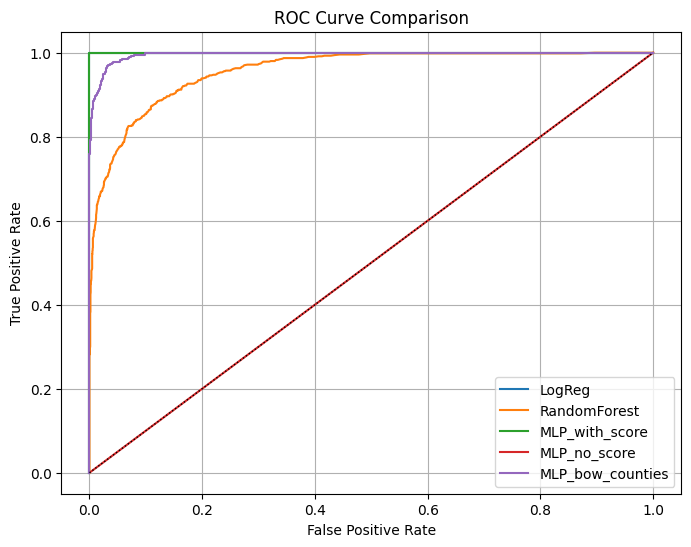

In [16]:
plt.figure(figsize=(8,6))

for name, data in models.items():
    y = data["y"]
    probs = data["probs"]

    fpr, tpr, _ = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0,1],[0,1], color="black", linewidth=1, linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.savefig("results/combined_roc_curve.png", dpi=150)
plt.show()

## Precision-Recall Curve for all models

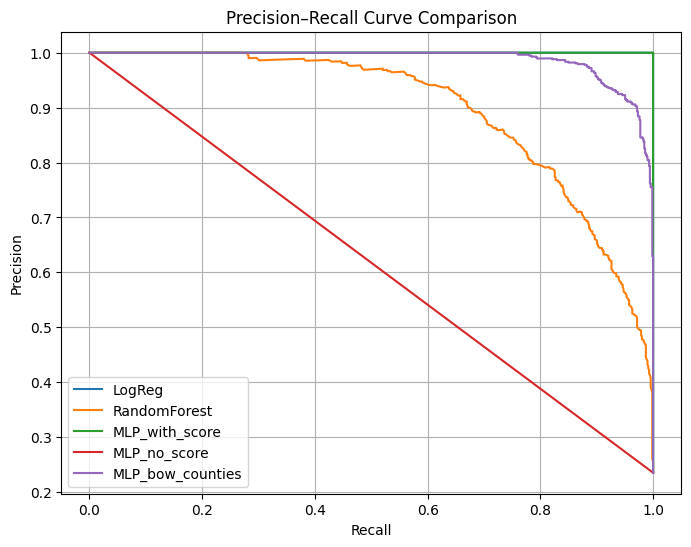

In [15]:
plt.figure(figsize=(8,6))

for name, data in models.items():
    y = data["y"]
    probs = data["probs"]

    precision, recall, _ = precision_recall_curve(y, probs)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.savefig("results/combined_pr_curve.png", dpi=150)
plt.show()
